In [1]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# data files
mouse_drug_data = "Pymaceuticals/data/Mouse_metadata.csv"
study_results = "Pymaceuticals/data/Study_results.csv"

# read csv data
mouse_drug_data_df = pd.read_csv(mouse_drug_data)
study_results_df = pd.read_csv(study_results)

# Combined data into one df
total_trial_data_df=pd.merge(study_results_df,mouse_drug_data_df,how='outer',on='Mouse ID')
total_trial_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
#number of unique mice
unique_mice=total_trial_data_df["Mouse ID"].nunique()
unique_mice

249

In [3]:
#duplicate mouse ID and timepoint
duplicate_mice=total_trial_data_df.loc[total_trial_data_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
#clean df 
clean_trial_data=total_trial_data_df.loc[total_trial_data_df["Mouse ID"] !="g989",:]
clean_trial_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
#unique mice in clean df
clean_mice_number=clean_trial_data["Mouse ID"].nunique()
clean_mice_number

248

In [6]:
#tumor stats
tumor_mean=clean_trial_data['Tumor Volume (mm3)'].groupby(clean_trial_data['Drug Regimen']).mean()

tumor_median=clean_trial_data['Tumor Volume (mm3)'].groupby(clean_trial_data['Drug Regimen']).median()

tumor_variance=clean_trial_data['Tumor Volume (mm3)'].groupby(clean_trial_data['Drug Regimen']).var()

tumor_stdev=clean_trial_data['Tumor Volume (mm3)'].groupby(clean_trial_data['Drug Regimen']).std()

tumor_sem=clean_trial_data['Tumor Volume (mm3)'].groupby(clean_trial_data['Drug Regimen']).sem()

#tumor stat summary df
tumor_stats=pd.DataFrame({"Mean Tumor Vol":tumor_mean,
                         "Median Tumor Vol":tumor_median,
                          "Tumor Vol Variance":tumor_variance,
                          "Tumor Vol Standard Dev":tumor_stdev,
                          "Tumor Vol Standard Err":tumor_sem})
tumor_stats

,Mean Tumor Vol,Median Tumor Vol,Tumor Vol Variance,Tumor Vol Standard Dev,Tumor Vol Standard Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
#summary stats using aggregation method
tumor_stats_aggregation=clean_trial_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
tumor_stats_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

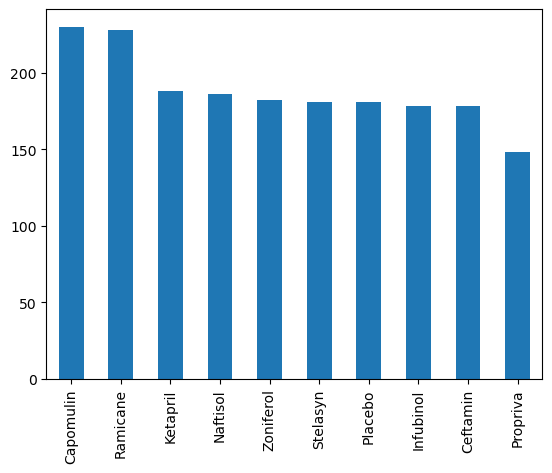

In [8]:
#bar plot with total number of rows (mouse id/timepoints) for each drug regimen
bar_plot=clean_trial_data['Drug Regimen'].value_counts()
mouse_plot=bar_plot.plot.bar(x='Drug Regimen',y='Number of Mice',fontsize='10')

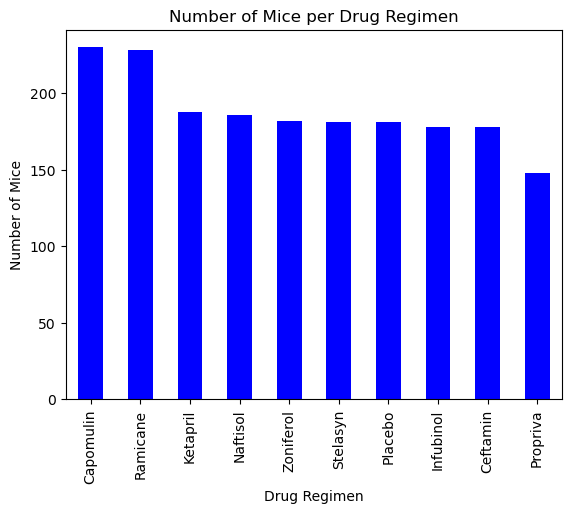

In [9]:
#bar plot with total number of rows (mouse id/timepoints) for each drug regimen using pyplot
plt.pandas=bar_plot.plot.bar(color='b')

#add title/labels
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

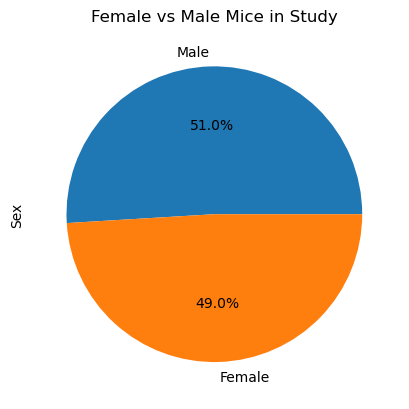

In [10]:
#pie plot with distribution of female vs male mice
sex_mice_pie=clean_trial_data["Sex"].value_counts()

#label
plt.title("Female vs Male Mice in Study")
sex_mice_pie.plot.pie(autopct="%1.1f%%")
plt.show()

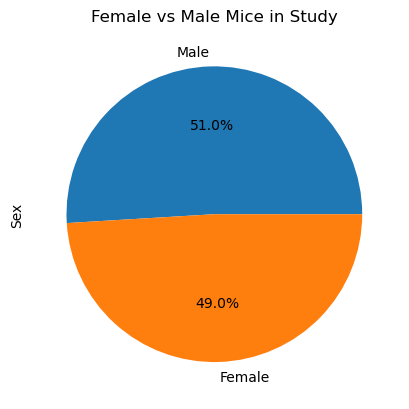

In [11]:
#pie plot with distribution of female vs male mice with pyplot
pie_plot=sex_mice_pie.plot.pie(y="Total Count",autopct="%1.1f%%")

#label
plt.title("Female vs Male Mice in Study")
plt.ylabel("Sex")
labels=["Female","Male"]
sizes=[49.4,50.6]

plt.show()

In [12]:
#calculate quartiles, find outliers, create boxplot
#final tumor vol for four treatments (Capomulin, Ramicane, Infubinol, and Ceftamin)
capomulin=clean_trial_data.loc[clean_trial_data["Drug Regimen"]=="Capomulin",:]
ramicane=clean_trial_data.loc[clean_trial_data["Drug Regimen"]=="Ramicane",:]
infubinol=clean_trial_data.loc[clean_trial_data["Drug Regimen"]=="Infubinol",:]
ceftamin=clean_trial_data.loc[clean_trial_data["Drug Regimen"]=="Ceftamin",:]

#grouped df that shows the last (greatest) time point for each mouse
last_capomulin=capomulin.groupby('Mouse ID').max()['Timepoint']
vol_capomulin=pd.DataFrame(last_capomulin)

last_ramicane=ramicane.groupby('Mouse ID').max()['Timepoint']
vol_ramicane=pd.DataFrame(last_ramicane)

last_infubinol=infubinol.groupby('Mouse ID').max()['Timepoint']
vol_infubinol=pd.DataFrame(last_infubinol)

last_ceftamin=ceftamin.groupby('Mouse ID').max()['Timepoint']
vol_ceftamin=pd.DataFrame(last_ceftamin)

In [13]:
#merge with original df for tumor vol at the last timepoint
capomulin_merge=pd.merge(vol_capomulin,clean_trial_data,on=("Mouse ID","Timepoint"),how="left")
ramicane_merge=pd.merge(vol_ramicane,clean_trial_data,on=("Mouse ID","Timepoint"),how="left")
infubinol_merge=pd.merge(vol_infubinol,clean_trial_data,on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge=pd.merge(vol_ceftamin,clean_trial_data,on=("Mouse ID","Timepoint"),how="left")

In [14]:
#list of treatments as well as second, empty list to hold tumor vol data
drug_regimen_list=["Capomulin","Ramicane","Infubinol","Ceftamin"]
drug_regimen=clean_trial_data[clean_trial_data['Drug Regimen'].isin(drug_regimen_list)]
drug_regimen.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [15]:
#tumor vol
tumor1=capomulin_merge["Tumor Volume (mm3)"]
tumor2=ramicane_merge["Tumor Volume (mm3)"]
tumor3=infubinol_merge["Tumor Volume (mm3)"]
tumor4=ceftamin_merge["Tumor Volume (mm3)"]

#create loop
for drug_regimen in drug_regimen_list:
    quartiles1=tumor1.quantile([.25,.5,.75]).round(2)
    upperq1=quartiles1[0.75].round(2)
    lowerq1=quartiles1[0.25].round(2)
    iqr1=round(upperq1-lowerq1,2)
    
    quartiles2=tumor2.quantile([.25,.5,.75]).round(2)
    upperq2=quartiles2[0.75].round(2)
    lowerq2=quartiles2[0.25].round(2)
    iqr2=round(upperq2-lowerq2,2)
    
    quartiles3=tumor3.quantile([.25,.5,.75]).round(2)
    upperq3=quartiles3[0.75].round(2)
    lowerq3=quartiles3[0.25].round(2)
    iqr3=round(upperq3-lowerq3,2)
    
    quartiles4=tumor4.quantile([.25,.5,.75]).round(2)
    upperq4=quartiles4[0.75].round(2)
    lowerq4=quartiles4[0.25].round(2)
    iqr4=round(upperq4-lowerq4,2)

In [16]:
#print values
#capomulin
print(f"Lower quartile of tumors treated with Capomulin: {lowerq1}")
print(f"Upper quartile of tumors treated with Capomulin: {upperq1}")
print(f"Interquartile of tumors treated with Capomulin: {iqr1}")
print(f"Median vol of tumors treated with Capomulin: {quartiles1[0.5]}")

#ramicane
print(f"Lower quartile of tumors treated with Ramicane: {lowerq2}")
print(f"Upper quartile of tumors treated with Ramicane: {upperq2}")
print(f"Interquartile of tumors treated with Ramicane: {iqr2}")
print(f"Median vol of tumors treated with Ramicane: {quartiles2[0.5]}")

#infubinol 
print(f"Lower quartile of tumors treated with Infubinol: {lowerq3}")
print(f"Upper quartile of tumors treated with Infubinol: {upperq3}")
print(f"Interquartile of tumors treated with Infubinol: {iqr3}")
print(f"Median vol of tumors treated with Infubinol: {quartiles3[0.5]}")

#ceftamin  
print(f"Lower quartile of tumors treated with Ceftamin: {lowerq4}")
print(f"Upper quartile of tumors treated with Ceftamin: {upperq4}")
print(f"Interquartile of tumors treated with Ceftamin: {iqr4}")
print(f"Median vol of tumors treated with Ceftamin: {quartiles4[0.5]}")

Lower quartile of tumors treated with Capomulin: 32.38
Upper quartile of tumors treated with Capomulin: 40.16
Interquartile of tumors treated with Capomulin: 7.78
Median vol of tumors treated with Capomulin: 38.13
Lower quartile of tumors treated with Ramicane: 31.56
Upper quartile of tumors treated with Ramicane: 40.66
Interquartile of tumors treated with Ramicane: 9.1
Median vol of tumors treated with Ramicane: 36.56
Lower quartile of tumors treated with Infubinol: 54.05
Upper quartile of tumors treated with Infubinol: 65.53
Interquartile of tumors treated with Infubinol: 11.48
Median vol of tumors treated with Infubinol: 60.17
Lower quartile of tumors treated with Ceftamin: 48.72
Upper quartile of tumors treated with Ceftamin: 64.3
Interquartile of tumors treated with Ceftamin: 15.58
Median vol of tumors treated with Ceftamin: 59.85


In [17]:
#empty list to hold tumor vol data for plotting
total_regimen_list=[tumor1,tumor2,tumor3,tumor4]

In [18]:
# determine if there are any potential outliers across all four treatment regimens
#capomulin
upper_bound1=round(upperq1+(1.5*iqr1),2)
lower_bound1=round(lowerq1-(1.5*iqr1),2)

#ramicane
upper_bound2=round(upperq2+(1.5*iqr2),2)
lower_bound2=round(lowerq2-(1.5*iqr2),2)

#infubinol
upper_bound3=round(upperq3+(1.5*iqr3),2)
lower_bound3=round(lowerq3-(1.5*iqr3),2)

#ceftamin
upper_bound4=round(upperq4+(1.5*iqr4),2)
lower_bound4=round(lowerq4-(1.5*iqr4),2)

In [19]:
#print outlier results
#capomulin
print(f"Values above {upper_bound1} mm3 are potential outliers for Capomulin.")
print(f"Values below {lower_bound1} mm3 are potential outliers for Capomulin.")

#ramicane
print(f"Values above {upper_bound2} mm3 are potential outliers for Ramicane.")
print(f"Values below {lower_bound2} mm3 are potential outliers for Ramicane.")

#infubinol
print(f"Values above {upper_bound3} mm3 are potential outliers for Infubinol.")
print(f"Values below {lower_bound3} mm3 are potential outliers for Infubinol.")

#ceftamin
print(f"Values above {upper_bound4} mm3 are potential outliers for Ceftamin.")
print(f"Values below {lower_bound4} mm3 are potential outliers for Ceftamin.")

Values above 51.83 mm3 are potential outliers for Capomulin.
Values below 20.71 mm3 are potential outliers for Capomulin.
Values above 54.31 mm3 are potential outliers for Ramicane.
Values below 17.91 mm3 are potential outliers for Ramicane.
Values above 82.75 mm3 are potential outliers for Infubinol.
Values below 36.83 mm3 are potential outliers for Infubinol.
Values above 87.67 mm3 are potential outliers for Ceftamin.
Values below 25.35 mm3 are potential outliers for Ceftamin.


Text(0, 0.5, 'Final Tumor Vol (mm3)')

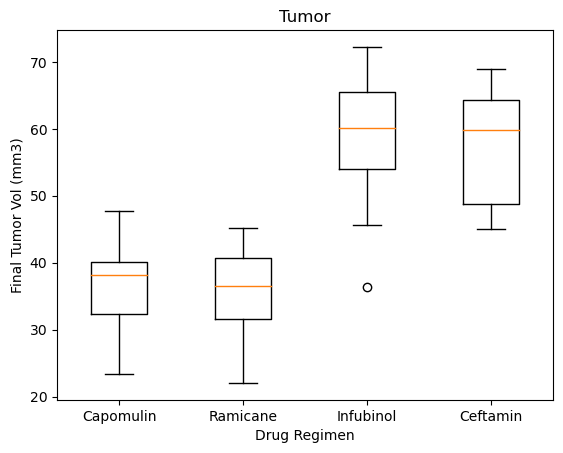

In [20]:
#box plot for distribution of tumor vol for each of four treatments
boxplot=[tumor1,tumor2,tumor3,tumor4]

tumor1=capomulin_merge["Tumor Volume (mm3)"]
tumor2=ramicane_merge["Tumor Volume (mm3)"]
tumor3=infubinol_merge["Tumor Volume (mm3)"]
tumor4=ceftamin_merge["Tumor Volume (mm3)"]

#labels
fig,ax=plt.subplots()
ax.boxplot(boxplot,labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])
ax.set_title("Tumor")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Final Tumor Vol (mm3)")


Text(0, 0.5, 'Tumor Volume (mm3)')

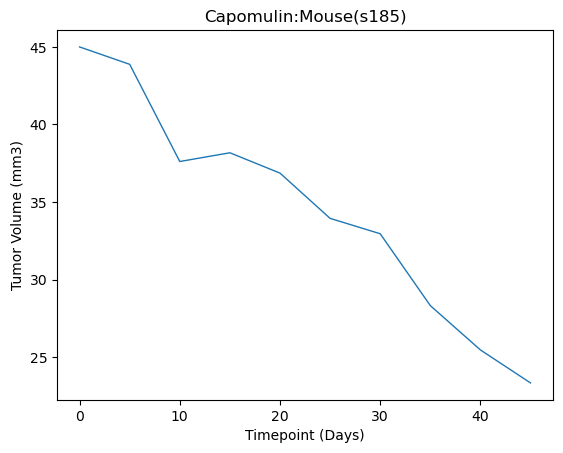

In [21]:
#line plot of tumor vol vs time point for single mouse treated with Capomulin (s185)
line_plot=capomulin.loc[capomulin["Mouse ID"]=="s185",:]
x_axis=line_plot["Timepoint"]
y_axis=line_plot["Tumor Volume (mm3)"]

#labels
fig1,ax1=plt.subplots()
plt.plot(x_axis,y_axis,linewidth=1,markersize=10)
plt.title("Capomulin:Mouse(s185)")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

/var/folders/vq/0fk27r_d7fvdfvmppyp7ky6r0000gn/T/ipykernel_7509/949653810.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_avg=capomulin.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

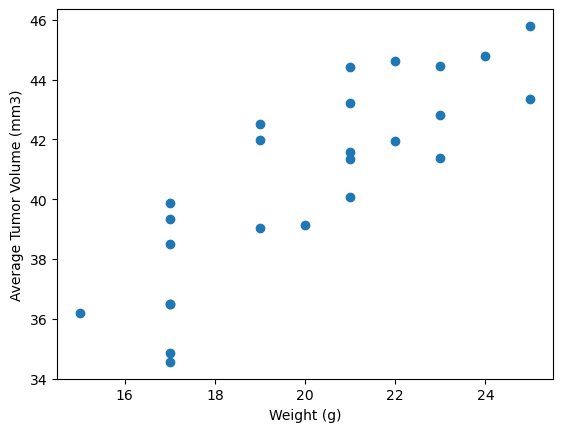

In [22]:
#scatter plot of mouse weight vs average observed tumor vol for full Capomulin treatment
capomulin_avg=capomulin.groupby(['Mouse ID']).mean()

#labels
plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

In [23]:
#calculate correlation and regression
#calculate correlation coefficient and linear regression model between mouse weight and avg observed tumor vol for the entire Capomulin 

lin_reg=st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])

correlation=round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation coefficient is: {correlation}")

The correlation coefficient is: 0.84


NameError: name 'mslope' is not defined

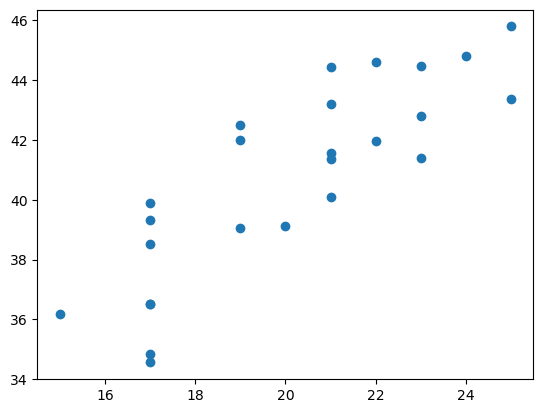

In [24]:
#labels
plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
y_value2=(capomulin_avg["Weight (g)"])*mslope+bintercept
plt.plot(capomulin_avg["Weight (g)"],y_value2,color="b")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")